# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

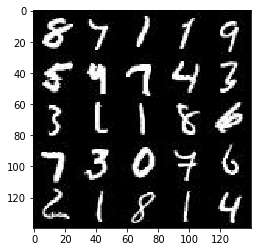

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

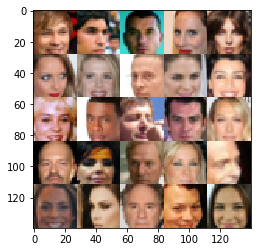

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/thebiest/anaconda3/envs/GANs/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # DONE: Implement Function
    inputs_real = tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32,(None, z_dim), name='inputs_z')
    learningrate = tf.placeholder(tf.float32, name='learningrate')

    return inputs_real, inputs_z, learningrate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # DONE: Implement Function
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input image
        x = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x, x)
        # 28x28x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14x14x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
    #return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # DONE: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First full connected Layer
        x = tf.layers.dense(z, 7*7*512)
        # Reshape to start conv nets
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        # 7 * 7 * 512
        
        
        # create the convolution steps
        x2 = tf.layers.conv2d_transpose(x, 256,  5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14 * 14 * 256 now
        
        
        # create the convolution steps
        x3 = tf.layers.conv2d_transpose(x2, 256,  5, strides=2, padding='same') #256
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28 * 28 * 128 now
                
        # Output layer, 32x32x3
        logits =  tf.layers.conv2d_transpose(x3, out_channel_dim, 5 , strides=1, padding='same')
        
        out = tf.tanh(logits)
        
        return out
    



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # DONE: Implement Function
    # generator model
    gen_model = generator(input_z, out_channel_dim) 
    
    # discriminator model
    dis_model_real, dis_logits_real = discriminator(input_real) 
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    # loss
    dis_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_model_real)))
    dis_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_model_fake)))
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_model_fake)))

    dis_loss = dis_loss_real + dis_loss_fake
    
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # DONE: Implement Function
    # See DCGANS_Exercises
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # DONE : Build Model
    show_every=100
    print_every=10
    steps=0
    
    dimesion = 3 if data_image_mode== "RGB" else 1
    image_width, image_height, image_channels =(data_shape[1], data_shape[2], data_shape[3])
    input_real, input_z, ph_learning_rate=model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, dimesion)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps+=1
                batch_images*=2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # 
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z})                
    
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    #losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 9, input_z, image_channels, data_image_mode)
          

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 22.8554
Epoch 1/2... Discriminator Loss: 0.0292... Generator Loss: 9.9063
Epoch 1/2... Discriminator Loss: 0.1162... Generator Loss: 7.4051
Epoch 1/2... Discriminator Loss: 0.9249... Generator Loss: 1.5581
Epoch 1/2... Discriminator Loss: 0.3624... Generator Loss: 10.6534
Epoch 1/2... Discriminator Loss: 2.3509... Generator Loss: 0.4800
Epoch 1/2... Discriminator Loss: 0.2816... Generator Loss: 3.0296
Epoch 1/2... Discriminator Loss: 0.0319... Generator Loss: 9.5634
Epoch 1/2... Discriminator Loss: 0.6364... Generator Loss: 1.6487
Epoch 1/2... Discriminator Loss: 3.7549... Generator Loss: 0.1893


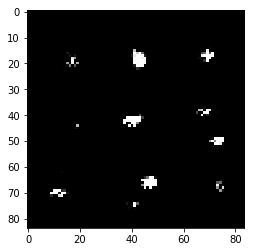

Epoch 1/2... Discriminator Loss: 0.2010... Generator Loss: 2.5364
Epoch 1/2... Discriminator Loss: 0.7796... Generator Loss: 1.2601
Epoch 1/2... Discriminator Loss: 0.5901... Generator Loss: 3.6161
Epoch 1/2... Discriminator Loss: 0.6373... Generator Loss: 3.0880
Epoch 1/2... Discriminator Loss: 1.4802... Generator Loss: 0.4819
Epoch 1/2... Discriminator Loss: 1.4521... Generator Loss: 0.4108
Epoch 1/2... Discriminator Loss: 1.3783... Generator Loss: 5.9102
Epoch 1/2... Discriminator Loss: 0.2317... Generator Loss: 4.5802
Epoch 1/2... Discriminator Loss: 0.2586... Generator Loss: 2.5876
Epoch 1/2... Discriminator Loss: 0.2097... Generator Loss: 2.4555


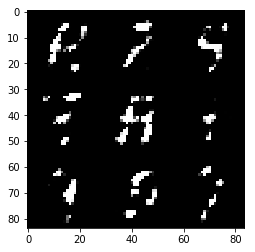

Epoch 1/2... Discriminator Loss: 0.1182... Generator Loss: 3.6628
Epoch 1/2... Discriminator Loss: 1.3652... Generator Loss: 0.5283
Epoch 1/2... Discriminator Loss: 0.3212... Generator Loss: 2.4135
Epoch 1/2... Discriminator Loss: 0.2354... Generator Loss: 2.1816
Epoch 1/2... Discriminator Loss: 0.3565... Generator Loss: 1.8343
Epoch 1/2... Discriminator Loss: 0.2192... Generator Loss: 2.8371
Epoch 1/2... Discriminator Loss: 0.0167... Generator Loss: 5.0284
Epoch 1/2... Discriminator Loss: 0.0762... Generator Loss: 3.8561
Epoch 1/2... Discriminator Loss: 0.5029... Generator Loss: 1.5048
Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 0.9096


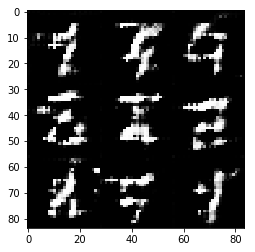

Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.1002... Generator Loss: 2.4190
Epoch 1/2... Discriminator Loss: 1.4059... Generator Loss: 0.5787
Epoch 1/2... Discriminator Loss: 0.6957... Generator Loss: 1.1163
Epoch 1/2... Discriminator Loss: 1.4145... Generator Loss: 1.4856
Epoch 1/2... Discriminator Loss: 0.7637... Generator Loss: 1.1836
Epoch 1/2... Discriminator Loss: 1.2282... Generator Loss: 0.7082
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 0.5229
Epoch 1/2... Discriminator Loss: 0.8540... Generator Loss: 1.8953
Epoch 1/2... Discriminator Loss: 1.1316... Generator Loss: 1.0144


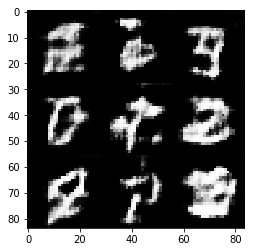

Epoch 1/2... Discriminator Loss: 0.9535... Generator Loss: 0.8343
Epoch 1/2... Discriminator Loss: 1.5025... Generator Loss: 0.4878
Epoch 1/2... Discriminator Loss: 1.2891... Generator Loss: 0.6986
Epoch 1/2... Discriminator Loss: 1.1305... Generator Loss: 0.7027
Epoch 1/2... Discriminator Loss: 1.2981... Generator Loss: 0.5337
Epoch 1/2... Discriminator Loss: 1.3108... Generator Loss: 0.5464
Epoch 1/2... Discriminator Loss: 1.1529... Generator Loss: 0.6497
Epoch 1/2... Discriminator Loss: 0.8902... Generator Loss: 0.8977
Epoch 1/2... Discriminator Loss: 1.2113... Generator Loss: 1.1023
Epoch 1/2... Discriminator Loss: 1.2637... Generator Loss: 0.5524


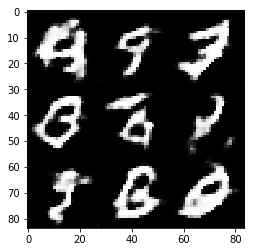

Epoch 1/2... Discriminator Loss: 0.8833... Generator Loss: 1.1792
Epoch 1/2... Discriminator Loss: 1.8970... Generator Loss: 0.2337
Epoch 1/2... Discriminator Loss: 1.5464... Generator Loss: 0.4585
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 0.7268
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 0.7265
Epoch 1/2... Discriminator Loss: 1.4264... Generator Loss: 0.4926
Epoch 1/2... Discriminator Loss: 1.1349... Generator Loss: 0.7563
Epoch 1/2... Discriminator Loss: 0.9936... Generator Loss: 1.2721
Epoch 1/2... Discriminator Loss: 1.4214... Generator Loss: 0.4078
Epoch 1/2... Discriminator Loss: 0.9281... Generator Loss: 1.4864


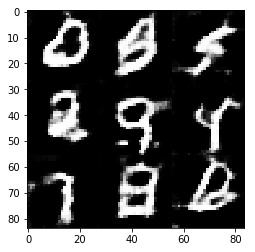

Epoch 1/2... Discriminator Loss: 1.4481... Generator Loss: 0.3815
Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 0.8602
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 0.8868
Epoch 1/2... Discriminator Loss: 1.0406... Generator Loss: 1.3136
Epoch 1/2... Discriminator Loss: 1.0321... Generator Loss: 0.7609
Epoch 1/2... Discriminator Loss: 0.8965... Generator Loss: 1.2323
Epoch 1/2... Discriminator Loss: 1.0679... Generator Loss: 0.6708
Epoch 1/2... Discriminator Loss: 1.3917... Generator Loss: 0.4915
Epoch 1/2... Discriminator Loss: 1.3641... Generator Loss: 0.4531
Epoch 1/2... Discriminator Loss: 1.3315... Generator Loss: 0.5204


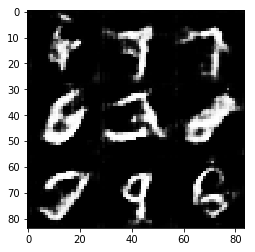

Epoch 1/2... Discriminator Loss: 1.0273... Generator Loss: 0.7397
Epoch 1/2... Discriminator Loss: 1.0171... Generator Loss: 1.0913
Epoch 1/2... Discriminator Loss: 0.9130... Generator Loss: 0.7399
Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 0.9094
Epoch 1/2... Discriminator Loss: 0.9783... Generator Loss: 0.8724
Epoch 1/2... Discriminator Loss: 1.4630... Generator Loss: 0.3481
Epoch 1/2... Discriminator Loss: 1.0750... Generator Loss: 0.8843
Epoch 1/2... Discriminator Loss: 1.0919... Generator Loss: 1.1838
Epoch 1/2... Discriminator Loss: 0.8715... Generator Loss: 1.1847
Epoch 1/2... Discriminator Loss: 0.9552... Generator Loss: 1.9002


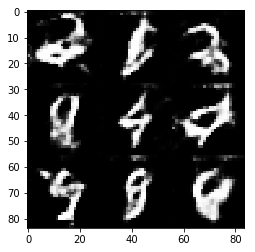

Epoch 1/2... Discriminator Loss: 0.9592... Generator Loss: 1.8550
Epoch 1/2... Discriminator Loss: 1.1558... Generator Loss: 0.6557
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 1.2073
Epoch 1/2... Discriminator Loss: 1.4683... Generator Loss: 0.3872
Epoch 1/2... Discriminator Loss: 0.9888... Generator Loss: 0.6710
Epoch 1/2... Discriminator Loss: 1.3810... Generator Loss: 0.4621
Epoch 1/2... Discriminator Loss: 1.0665... Generator Loss: 0.6815
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 2.5016
Epoch 1/2... Discriminator Loss: 1.4735... Generator Loss: 0.4118
Epoch 1/2... Discriminator Loss: 1.1288... Generator Loss: 0.6354


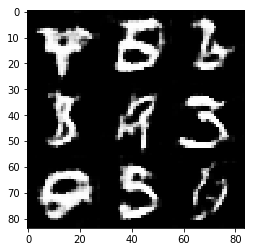

Epoch 1/2... Discriminator Loss: 1.0847... Generator Loss: 1.0613
Epoch 1/2... Discriminator Loss: 1.3856... Generator Loss: 0.5860
Epoch 1/2... Discriminator Loss: 0.9316... Generator Loss: 0.8409
Epoch 1/2... Discriminator Loss: 0.9909... Generator Loss: 1.0227
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 0.8286
Epoch 1/2... Discriminator Loss: 1.6381... Generator Loss: 0.2971
Epoch 1/2... Discriminator Loss: 1.5295... Generator Loss: 0.4267
Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 2.0991
Epoch 1/2... Discriminator Loss: 0.8842... Generator Loss: 0.9280
Epoch 1/2... Discriminator Loss: 0.9355... Generator Loss: 1.8433


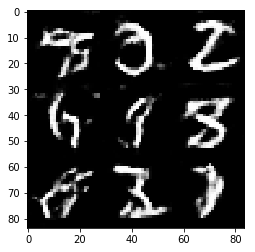

Epoch 1/2... Discriminator Loss: 1.4894... Generator Loss: 0.4257
Epoch 1/2... Discriminator Loss: 1.3122... Generator Loss: 0.5577
Epoch 1/2... Discriminator Loss: 0.6626... Generator Loss: 1.6184
Epoch 1/2... Discriminator Loss: 2.6572... Generator Loss: 3.5797
Epoch 1/2... Discriminator Loss: 1.3375... Generator Loss: 0.7779
Epoch 1/2... Discriminator Loss: 1.0569... Generator Loss: 0.8101
Epoch 1/2... Discriminator Loss: 1.1100... Generator Loss: 0.6734
Epoch 1/2... Discriminator Loss: 1.6295... Generator Loss: 0.3839
Epoch 1/2... Discriminator Loss: 1.2046... Generator Loss: 0.5234
Epoch 1/2... Discriminator Loss: 1.0007... Generator Loss: 0.7418


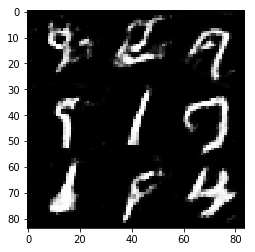

Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 0.8690
Epoch 1/2... Discriminator Loss: 1.2474... Generator Loss: 0.6499
Epoch 1/2... Discriminator Loss: 1.1494... Generator Loss: 0.7648
Epoch 1/2... Discriminator Loss: 1.5136... Generator Loss: 0.4805
Epoch 1/2... Discriminator Loss: 1.2399... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 1.0259
Epoch 1/2... Discriminator Loss: 1.0465... Generator Loss: 0.8909
Epoch 1/2... Discriminator Loss: 1.1932... Generator Loss: 0.6154
Epoch 1/2... Discriminator Loss: 1.1925... Generator Loss: 0.6371
Epoch 1/2... Discriminator Loss: 0.8589... Generator Loss: 1.0341


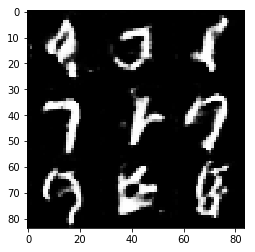

Epoch 1/2... Discriminator Loss: 1.2396... Generator Loss: 0.5403
Epoch 1/2... Discriminator Loss: 0.9414... Generator Loss: 1.0419
Epoch 1/2... Discriminator Loss: 1.0749... Generator Loss: 0.6353
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 2.3274
Epoch 1/2... Discriminator Loss: 0.9055... Generator Loss: 1.5599
Epoch 1/2... Discriminator Loss: 1.3088... Generator Loss: 1.0572
Epoch 1/2... Discriminator Loss: 1.0620... Generator Loss: 0.7195
Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.6964... Generator Loss: 0.3081
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 1.5098


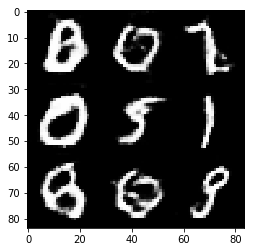

Epoch 1/2... Discriminator Loss: 1.5399... Generator Loss: 0.4237
Epoch 1/2... Discriminator Loss: 1.2385... Generator Loss: 0.6978
Epoch 1/2... Discriminator Loss: 0.7009... Generator Loss: 1.1247
Epoch 1/2... Discriminator Loss: 1.2235... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 0.6916... Generator Loss: 1.1006
Epoch 1/2... Discriminator Loss: 1.4810... Generator Loss: 0.3502
Epoch 1/2... Discriminator Loss: 0.7484... Generator Loss: 1.4694
Epoch 1/2... Discriminator Loss: 1.8472... Generator Loss: 0.2820
Epoch 1/2... Discriminator Loss: 0.9906... Generator Loss: 0.9178
Epoch 1/2... Discriminator Loss: 0.8904... Generator Loss: 0.7939


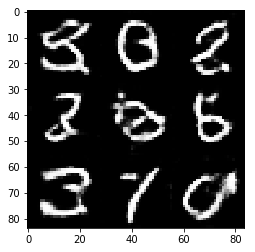

Epoch 1/2... Discriminator Loss: 1.1240... Generator Loss: 0.8091
Epoch 1/2... Discriminator Loss: 0.7726... Generator Loss: 1.0531
Epoch 1/2... Discriminator Loss: 1.5914... Generator Loss: 0.3646
Epoch 1/2... Discriminator Loss: 0.6184... Generator Loss: 1.2911
Epoch 1/2... Discriminator Loss: 0.9021... Generator Loss: 0.7091
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 0.7535
Epoch 1/2... Discriminator Loss: 0.8849... Generator Loss: 0.9319
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 1.8661
Epoch 1/2... Discriminator Loss: 0.9501... Generator Loss: 0.7533
Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.5210


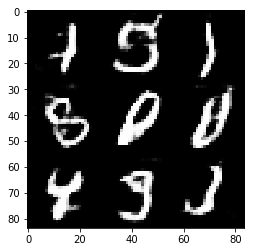

Epoch 1/2... Discriminator Loss: 1.6277... Generator Loss: 0.4561
Epoch 1/2... Discriminator Loss: 1.2711... Generator Loss: 1.4221
Epoch 1/2... Discriminator Loss: 0.5853... Generator Loss: 1.6070
Epoch 1/2... Discriminator Loss: 0.6841... Generator Loss: 1.3540
Epoch 1/2... Discriminator Loss: 0.7051... Generator Loss: 3.1591
Epoch 1/2... Discriminator Loss: 1.4596... Generator Loss: 0.4241
Epoch 1/2... Discriminator Loss: 1.4056... Generator Loss: 0.4246
Epoch 1/2... Discriminator Loss: 1.1820... Generator Loss: 0.5540
Epoch 1/2... Discriminator Loss: 1.1679... Generator Loss: 3.0581
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 0.7197


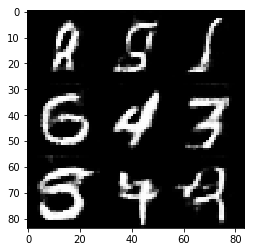

Epoch 1/2... Discriminator Loss: 0.5265... Generator Loss: 1.2659
Epoch 1/2... Discriminator Loss: 0.8392... Generator Loss: 0.9040
Epoch 1/2... Discriminator Loss: 1.0840... Generator Loss: 0.8212
Epoch 1/2... Discriminator Loss: 1.1064... Generator Loss: 1.1853
Epoch 1/2... Discriminator Loss: 1.0065... Generator Loss: 0.8848
Epoch 1/2... Discriminator Loss: 1.5342... Generator Loss: 2.5247
Epoch 1/2... Discriminator Loss: 0.9744... Generator Loss: 1.6363
Epoch 1/2... Discriminator Loss: 0.9850... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 0.7340... Generator Loss: 1.4796
Epoch 1/2... Discriminator Loss: 0.8061... Generator Loss: 1.0277


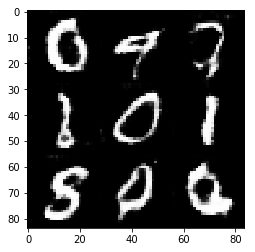

Epoch 1/2... Discriminator Loss: 1.4712... Generator Loss: 0.4014
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 0.4240
Epoch 1/2... Discriminator Loss: 1.4473... Generator Loss: 0.4957
Epoch 1/2... Discriminator Loss: 0.9708... Generator Loss: 0.8414
Epoch 1/2... Discriminator Loss: 0.9976... Generator Loss: 0.7449
Epoch 1/2... Discriminator Loss: 0.6599... Generator Loss: 1.2983
Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 0.8656
Epoch 1/2... Discriminator Loss: 0.6711... Generator Loss: 1.3533
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.0989
Epoch 1/2... Discriminator Loss: 0.6914... Generator Loss: 1.8012


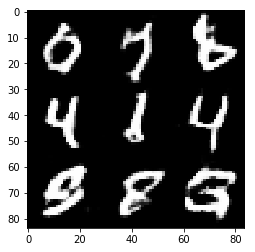

Epoch 1/2... Discriminator Loss: 0.5046... Generator Loss: 1.4253
Epoch 1/2... Discriminator Loss: 0.9409... Generator Loss: 0.7600
Epoch 1/2... Discriminator Loss: 0.9859... Generator Loss: 0.7385
Epoch 1/2... Discriminator Loss: 0.8422... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 0.5173... Generator Loss: 1.3405
Epoch 1/2... Discriminator Loss: 1.4872... Generator Loss: 0.3996
Epoch 1/2... Discriminator Loss: 1.2410... Generator Loss: 0.5656
Epoch 2/2... Discriminator Loss: 0.8898... Generator Loss: 0.8552
Epoch 2/2... Discriminator Loss: 0.8563... Generator Loss: 1.2619
Epoch 2/2... Discriminator Loss: 1.2392... Generator Loss: 0.6551


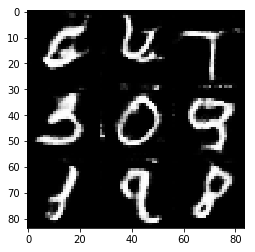

Epoch 2/2... Discriminator Loss: 0.6516... Generator Loss: 1.4650
Epoch 2/2... Discriminator Loss: 0.8910... Generator Loss: 1.4168
Epoch 2/2... Discriminator Loss: 1.9055... Generator Loss: 0.2873
Epoch 2/2... Discriminator Loss: 1.0521... Generator Loss: 0.7951
Epoch 2/2... Discriminator Loss: 1.1223... Generator Loss: 0.6700
Epoch 2/2... Discriminator Loss: 0.8248... Generator Loss: 1.2967
Epoch 2/2... Discriminator Loss: 1.3601... Generator Loss: 0.4218
Epoch 2/2... Discriminator Loss: 0.8933... Generator Loss: 1.0991
Epoch 2/2... Discriminator Loss: 1.0462... Generator Loss: 0.8172
Epoch 2/2... Discriminator Loss: 0.9492... Generator Loss: 1.1482


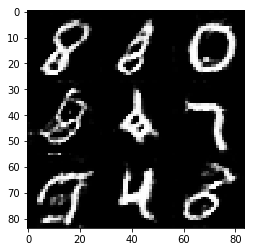

Epoch 2/2... Discriminator Loss: 0.6291... Generator Loss: 1.7507
Epoch 2/2... Discriminator Loss: 0.8572... Generator Loss: 0.9380
Epoch 2/2... Discriminator Loss: 0.9808... Generator Loss: 0.6803
Epoch 2/2... Discriminator Loss: 0.7458... Generator Loss: 0.9536
Epoch 2/2... Discriminator Loss: 1.0422... Generator Loss: 0.8919
Epoch 2/2... Discriminator Loss: 2.0855... Generator Loss: 0.2782
Epoch 2/2... Discriminator Loss: 0.6575... Generator Loss: 1.2447
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 2.1656
Epoch 2/2... Discriminator Loss: 0.9855... Generator Loss: 0.9915
Epoch 2/2... Discriminator Loss: 0.6345... Generator Loss: 1.4390


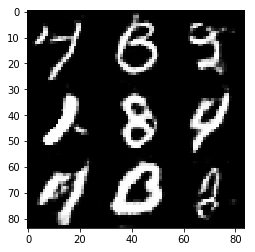

Epoch 2/2... Discriminator Loss: 0.9464... Generator Loss: 0.7836
Epoch 2/2... Discriminator Loss: 1.2948... Generator Loss: 0.5178
Epoch 2/2... Discriminator Loss: 0.8047... Generator Loss: 0.9169
Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 0.5605
Epoch 2/2... Discriminator Loss: 1.6265... Generator Loss: 0.4383
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 1.8449
Epoch 2/2... Discriminator Loss: 0.7657... Generator Loss: 2.9544
Epoch 2/2... Discriminator Loss: 1.4205... Generator Loss: 0.4505
Epoch 2/2... Discriminator Loss: 0.9441... Generator Loss: 0.9786
Epoch 2/2... Discriminator Loss: 1.1033... Generator Loss: 0.7301


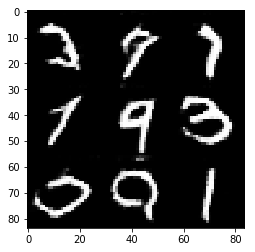

Epoch 2/2... Discriminator Loss: 1.5761... Generator Loss: 0.3581
Epoch 2/2... Discriminator Loss: 0.3586... Generator Loss: 1.8078
Epoch 2/2... Discriminator Loss: 0.8586... Generator Loss: 0.9738
Epoch 2/2... Discriminator Loss: 0.6097... Generator Loss: 1.4341
Epoch 2/2... Discriminator Loss: 0.4794... Generator Loss: 2.4818
Epoch 2/2... Discriminator Loss: 0.7105... Generator Loss: 1.1320
Epoch 2/2... Discriminator Loss: 1.2087... Generator Loss: 0.5763
Epoch 2/2... Discriminator Loss: 0.5447... Generator Loss: 1.4334
Epoch 2/2... Discriminator Loss: 1.2516... Generator Loss: 0.6464
Epoch 2/2... Discriminator Loss: 1.6087... Generator Loss: 0.3595


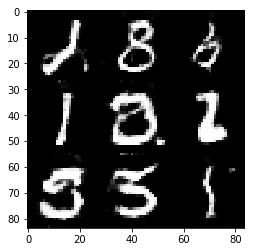

Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 0.6446
Epoch 2/2... Discriminator Loss: 1.5893... Generator Loss: 0.5866
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 0.6031
Epoch 2/2... Discriminator Loss: 1.1110... Generator Loss: 0.8564
Epoch 2/2... Discriminator Loss: 1.9361... Generator Loss: 0.2653
Epoch 2/2... Discriminator Loss: 1.5600... Generator Loss: 0.3764
Epoch 2/2... Discriminator Loss: 1.3022... Generator Loss: 0.4620
Epoch 2/2... Discriminator Loss: 0.6892... Generator Loss: 0.8863
Epoch 2/2... Discriminator Loss: 0.7016... Generator Loss: 1.3373
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 0.6729


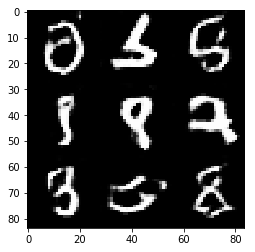

Epoch 2/2... Discriminator Loss: 0.9961... Generator Loss: 3.2205
Epoch 2/2... Discriminator Loss: 1.1958... Generator Loss: 1.0612
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 0.9227
Epoch 2/2... Discriminator Loss: 0.9723... Generator Loss: 0.7432
Epoch 2/2... Discriminator Loss: 1.5247... Generator Loss: 0.4775
Epoch 2/2... Discriminator Loss: 0.7283... Generator Loss: 1.5897
Epoch 2/2... Discriminator Loss: 0.8527... Generator Loss: 0.8555
Epoch 2/2... Discriminator Loss: 0.7564... Generator Loss: 1.2858
Epoch 2/2... Discriminator Loss: 0.5287... Generator Loss: 1.5456
Epoch 2/2... Discriminator Loss: 0.6933... Generator Loss: 1.1713


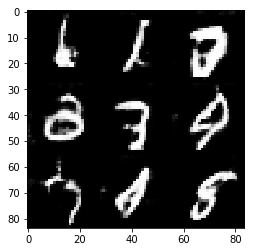

Epoch 2/2... Discriminator Loss: 0.7476... Generator Loss: 1.0311
Epoch 2/2... Discriminator Loss: 1.0601... Generator Loss: 0.8848
Epoch 2/2... Discriminator Loss: 1.3227... Generator Loss: 1.0267
Epoch 2/2... Discriminator Loss: 0.6635... Generator Loss: 1.0275
Epoch 2/2... Discriminator Loss: 0.9656... Generator Loss: 0.8930
Epoch 2/2... Discriminator Loss: 0.7621... Generator Loss: 0.9927
Epoch 2/2... Discriminator Loss: 1.2453... Generator Loss: 0.5640
Epoch 2/2... Discriminator Loss: 0.9178... Generator Loss: 0.7741
Epoch 2/2... Discriminator Loss: 1.6711... Generator Loss: 0.3712
Epoch 2/2... Discriminator Loss: 0.6996... Generator Loss: 1.1938


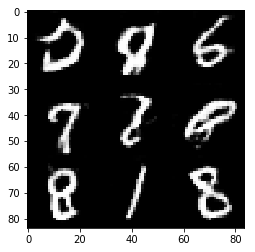

Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 2.6232
Epoch 2/2... Discriminator Loss: 0.9579... Generator Loss: 1.0012
Epoch 2/2... Discriminator Loss: 0.9908... Generator Loss: 1.7053
Epoch 2/2... Discriminator Loss: 0.5746... Generator Loss: 1.6992
Epoch 2/2... Discriminator Loss: 0.8555... Generator Loss: 0.9398
Epoch 2/2... Discriminator Loss: 1.3178... Generator Loss: 0.4431
Epoch 2/2... Discriminator Loss: 0.4668... Generator Loss: 2.3069
Epoch 2/2... Discriminator Loss: 0.6739... Generator Loss: 1.5158
Epoch 2/2... Discriminator Loss: 1.3361... Generator Loss: 0.5350
Epoch 2/2... Discriminator Loss: 0.7947... Generator Loss: 0.8862


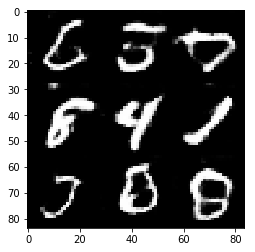

Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 0.9882
Epoch 2/2... Discriminator Loss: 0.8107... Generator Loss: 0.8709
Epoch 2/2... Discriminator Loss: 0.5699... Generator Loss: 1.4663
Epoch 2/2... Discriminator Loss: 0.5119... Generator Loss: 1.4977
Epoch 2/2... Discriminator Loss: 0.8483... Generator Loss: 0.9921
Epoch 2/2... Discriminator Loss: 1.3682... Generator Loss: 0.6645
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 0.8420
Epoch 2/2... Discriminator Loss: 0.9365... Generator Loss: 0.9062
Epoch 2/2... Discriminator Loss: 0.7613... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.2833... Generator Loss: 0.6279


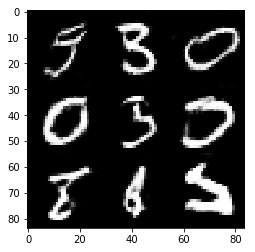

Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 0.8609
Epoch 2/2... Discriminator Loss: 0.5658... Generator Loss: 1.4548
Epoch 2/2... Discriminator Loss: 0.6402... Generator Loss: 2.7222
Epoch 2/2... Discriminator Loss: 1.3226... Generator Loss: 0.5124
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 0.8439
Epoch 2/2... Discriminator Loss: 0.8495... Generator Loss: 0.7911
Epoch 2/2... Discriminator Loss: 0.7300... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 0.5055... Generator Loss: 1.3463
Epoch 2/2... Discriminator Loss: 1.1218... Generator Loss: 0.8413
Epoch 2/2... Discriminator Loss: 0.5205... Generator Loss: 1.4363


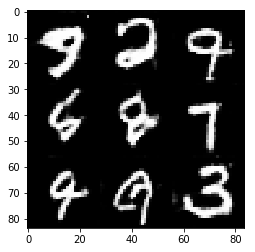

Epoch 2/2... Discriminator Loss: 0.6344... Generator Loss: 2.4222
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 1.5995
Epoch 2/2... Discriminator Loss: 2.7570... Generator Loss: 0.1653
Epoch 2/2... Discriminator Loss: 0.7390... Generator Loss: 1.9476
Epoch 2/2... Discriminator Loss: 1.2243... Generator Loss: 0.6273
Epoch 2/2... Discriminator Loss: 1.0056... Generator Loss: 0.7590
Epoch 2/2... Discriminator Loss: 0.7325... Generator Loss: 1.1253
Epoch 2/2... Discriminator Loss: 0.5893... Generator Loss: 1.2709
Epoch 2/2... Discriminator Loss: 0.5738... Generator Loss: 1.5877
Epoch 2/2... Discriminator Loss: 1.6432... Generator Loss: 0.3170


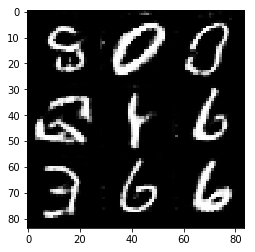

Epoch 2/2... Discriminator Loss: 0.9862... Generator Loss: 0.8510
Epoch 2/2... Discriminator Loss: 1.3914... Generator Loss: 0.6070
Epoch 2/2... Discriminator Loss: 0.6752... Generator Loss: 1.1576
Epoch 2/2... Discriminator Loss: 0.5408... Generator Loss: 1.4579
Epoch 2/2... Discriminator Loss: 0.6326... Generator Loss: 1.8054
Epoch 2/2... Discriminator Loss: 0.6988... Generator Loss: 1.9314
Epoch 2/2... Discriminator Loss: 1.1363... Generator Loss: 0.9729
Epoch 2/2... Discriminator Loss: 0.9952... Generator Loss: 1.0695
Epoch 2/2... Discriminator Loss: 1.1674... Generator Loss: 0.7083
Epoch 2/2... Discriminator Loss: 0.4088... Generator Loss: 1.8487


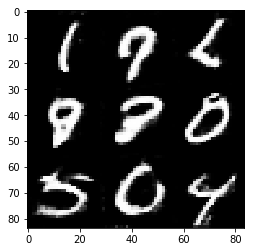

Epoch 2/2... Discriminator Loss: 0.9556... Generator Loss: 0.8751
Epoch 2/2... Discriminator Loss: 2.9441... Generator Loss: 0.1807
Epoch 2/2... Discriminator Loss: 0.7507... Generator Loss: 1.1370
Epoch 2/2... Discriminator Loss: 1.2829... Generator Loss: 0.8165
Epoch 2/2... Discriminator Loss: 0.9850... Generator Loss: 1.0650
Epoch 2/2... Discriminator Loss: 0.9204... Generator Loss: 0.8514
Epoch 2/2... Discriminator Loss: 0.9293... Generator Loss: 0.9476
Epoch 2/2... Discriminator Loss: 0.8547... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.4925... Generator Loss: 1.9995
Epoch 2/2... Discriminator Loss: 0.5624... Generator Loss: 1.4288


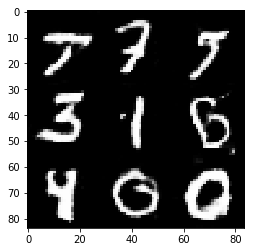

Epoch 2/2... Discriminator Loss: 1.6755... Generator Loss: 0.3942
Epoch 2/2... Discriminator Loss: 0.4847... Generator Loss: 1.5314
Epoch 2/2... Discriminator Loss: 1.1806... Generator Loss: 0.6565
Epoch 2/2... Discriminator Loss: 0.3873... Generator Loss: 1.7925
Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 0.7264
Epoch 2/2... Discriminator Loss: 0.6222... Generator Loss: 1.3680
Epoch 2/2... Discriminator Loss: 0.5129... Generator Loss: 1.7218
Epoch 2/2... Discriminator Loss: 0.5634... Generator Loss: 1.4553
Epoch 2/2... Discriminator Loss: 1.0439... Generator Loss: 0.8653
Epoch 2/2... Discriminator Loss: 0.5832... Generator Loss: 2.6584


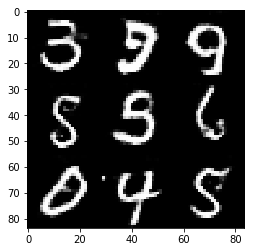

Epoch 2/2... Discriminator Loss: 0.5411... Generator Loss: 1.3056
Epoch 2/2... Discriminator Loss: 0.9064... Generator Loss: 0.8528
Epoch 2/2... Discriminator Loss: 1.3833... Generator Loss: 0.6097
Epoch 2/2... Discriminator Loss: 2.0015... Generator Loss: 0.2343
Epoch 2/2... Discriminator Loss: 1.1926... Generator Loss: 0.6676
Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 1.0455
Epoch 2/2... Discriminator Loss: 0.8570... Generator Loss: 1.1316
Epoch 2/2... Discriminator Loss: 0.8583... Generator Loss: 0.8707
Epoch 2/2... Discriminator Loss: 1.3801... Generator Loss: 0.3926
Epoch 2/2... Discriminator Loss: 0.6084... Generator Loss: 1.5491


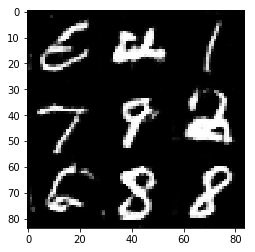

Epoch 2/2... Discriminator Loss: 0.6803... Generator Loss: 1.0496
Epoch 2/2... Discriminator Loss: 1.8965... Generator Loss: 0.3013
Epoch 2/2... Discriminator Loss: 1.1562... Generator Loss: 0.6546
Epoch 2/2... Discriminator Loss: 0.7394... Generator Loss: 1.9108
Epoch 2/2... Discriminator Loss: 0.7880... Generator Loss: 1.3870
Epoch 2/2... Discriminator Loss: 0.4558... Generator Loss: 1.7313
Epoch 2/2... Discriminator Loss: 0.4337... Generator Loss: 1.4799
Epoch 2/2... Discriminator Loss: 1.0874... Generator Loss: 0.6549
Epoch 2/2... Discriminator Loss: 1.1673... Generator Loss: 0.6882
Epoch 2/2... Discriminator Loss: 0.3928... Generator Loss: 1.6828


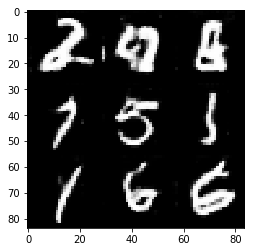

Epoch 2/2... Discriminator Loss: 1.0231... Generator Loss: 0.8137
Epoch 2/2... Discriminator Loss: 0.5684... Generator Loss: 1.2272
Epoch 2/2... Discriminator Loss: 2.4943... Generator Loss: 0.2340
Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 0.6681
Epoch 2/2... Discriminator Loss: 0.8207... Generator Loss: 0.9514
Epoch 2/2... Discriminator Loss: 0.6364... Generator Loss: 1.3723
Epoch 2/2... Discriminator Loss: 0.5520... Generator Loss: 1.2685
Epoch 2/2... Discriminator Loss: 0.8909... Generator Loss: 0.9275
Epoch 2/2... Discriminator Loss: 0.3958... Generator Loss: 2.0002
Epoch 2/2... Discriminator Loss: 0.8018... Generator Loss: 1.2364


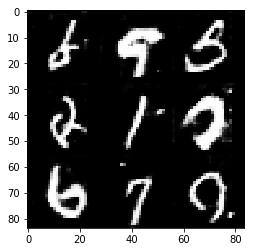

Epoch 2/2... Discriminator Loss: 0.7882... Generator Loss: 1.0804
Epoch 2/2... Discriminator Loss: 1.1202... Generator Loss: 0.6066
Epoch 2/2... Discriminator Loss: 1.2223... Generator Loss: 0.7013
Epoch 2/2... Discriminator Loss: 0.3041... Generator Loss: 2.0302
Epoch 2/2... Discriminator Loss: 0.6781... Generator Loss: 1.0136
Epoch 2/2... Discriminator Loss: 0.7737... Generator Loss: 2.6979
Epoch 2/2... Discriminator Loss: 2.4270... Generator Loss: 0.2157
Epoch 2/2... Discriminator Loss: 1.1571... Generator Loss: 0.5801
Epoch 2/2... Discriminator Loss: 0.8301... Generator Loss: 1.0184
Epoch 2/2... Discriminator Loss: 0.3921... Generator Loss: 1.9342


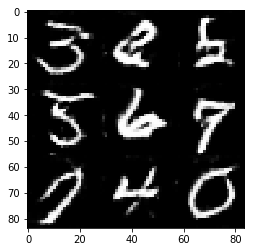

Epoch 2/2... Discriminator Loss: 1.0902... Generator Loss: 0.7601
Epoch 2/2... Discriminator Loss: 1.5110... Generator Loss: 0.5161
Epoch 2/2... Discriminator Loss: 1.3394... Generator Loss: 0.6673
Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.0423
Epoch 2/2... Discriminator Loss: 0.6711... Generator Loss: 1.1483


In [12]:
batch_size = 32
z_dim = 200
learning_rate = 0.001
beta1 = 0.6


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1598... Generator Loss: 0.2050
Epoch 1/1... Discriminator Loss: 0.9091... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 0.6078... Generator Loss: 1.4232
Epoch 1/1... Discriminator Loss: 0.4641... Generator Loss: 1.4489
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 0.5026
Epoch 1/1... Discriminator Loss: 0.2521... Generator Loss: 1.8923
Epoch 1/1... Discriminator Loss: 0.0796... Generator Loss: 2.9352
Epoch 1/1... Discriminator Loss: 0.2696... Generator Loss: 1.8399
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 0.9018


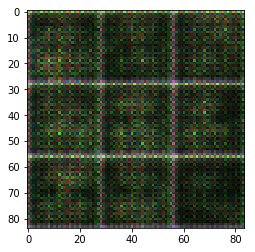

Epoch 1/1... Discriminator Loss: 0.8695... Generator Loss: 1.3799
Epoch 1/1... Discriminator Loss: 0.4217... Generator Loss: 1.6766
Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 0.5844
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.5147
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.5684
Epoch 1/1... Discriminator Loss: 0.4074... Generator Loss: 3.9605
Epoch 1/1... Discriminator Loss: 0.2521... Generator Loss: 3.2969
Epoch 1/1... Discriminator Loss: 0.7968... Generator Loss: 0.8179
Epoch 1/1... Discriminator Loss: 0.3183... Generator Loss: 2.1605
Epoch 1/1... Discriminator Loss: 0.1662... Generator Loss: 3.3035


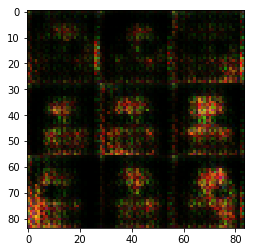

Epoch 1/1... Discriminator Loss: 0.5113... Generator Loss: 1.3883
Epoch 1/1... Discriminator Loss: 0.6863... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 0.1601... Generator Loss: 4.6575
Epoch 1/1... Discriminator Loss: 0.1330... Generator Loss: 3.2199
Epoch 1/1... Discriminator Loss: 0.4385... Generator Loss: 1.3318
Epoch 1/1... Discriminator Loss: 0.6207... Generator Loss: 2.6948
Epoch 1/1... Discriminator Loss: 0.4121... Generator Loss: 2.6184
Epoch 1/1... Discriminator Loss: 0.3126... Generator Loss: 2.2273
Epoch 1/1... Discriminator Loss: 0.1607... Generator Loss: 2.7190
Epoch 1/1... Discriminator Loss: 0.3829... Generator Loss: 6.8901


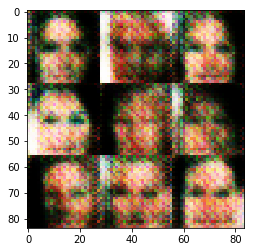

Epoch 1/1... Discriminator Loss: 0.3127... Generator Loss: 5.2553
Epoch 1/1... Discriminator Loss: 0.4434... Generator Loss: 2.8692
Epoch 1/1... Discriminator Loss: 1.1663... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 0.0621... Generator Loss: 4.2471
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 2.0298
Epoch 1/1... Discriminator Loss: 0.0925... Generator Loss: 5.2861
Epoch 1/1... Discriminator Loss: 0.2350... Generator Loss: 2.6316
Epoch 1/1... Discriminator Loss: 0.1425... Generator Loss: 2.8462
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.4295
Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 0.4546


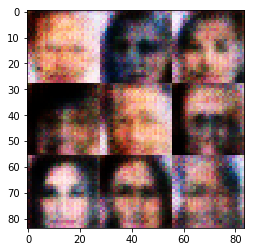

Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 1.9486
Epoch 1/1... Discriminator Loss: 0.1553... Generator Loss: 2.5750
Epoch 1/1... Discriminator Loss: 0.0749... Generator Loss: 4.1218
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 1.9626
Epoch 1/1... Discriminator Loss: 0.3004... Generator Loss: 3.6231
Epoch 1/1... Discriminator Loss: 0.4555... Generator Loss: 1.8287
Epoch 1/1... Discriminator Loss: 0.5940... Generator Loss: 1.0892
Epoch 1/1... Discriminator Loss: 0.3403... Generator Loss: 1.9862
Epoch 1/1... Discriminator Loss: 0.1117... Generator Loss: 3.5179
Epoch 1/1... Discriminator Loss: 0.1377... Generator Loss: 7.1814


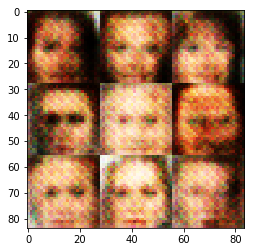

Epoch 1/1... Discriminator Loss: 0.6314... Generator Loss: 2.4362
Epoch 1/1... Discriminator Loss: 0.7877... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 0.2733... Generator Loss: 2.6914
Epoch 1/1... Discriminator Loss: 0.6761... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 0.8590... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 0.3338... Generator Loss: 6.3449
Epoch 1/1... Discriminator Loss: 0.6559... Generator Loss: 4.2020
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 10.9018
Epoch 1/1... Discriminator Loss: 0.0562... Generator Loss: 5.4582
Epoch 1/1... Discriminator Loss: 0.2678... Generator Loss: 2.4409


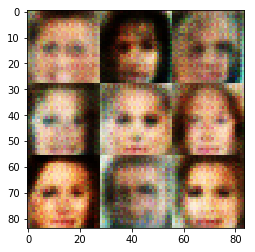

Epoch 1/1... Discriminator Loss: 0.4036... Generator Loss: 3.9265
Epoch 1/1... Discriminator Loss: 0.3163... Generator Loss: 2.6344
Epoch 1/1... Discriminator Loss: 0.2991... Generator Loss: 4.3572
Epoch 1/1... Discriminator Loss: 0.4479... Generator Loss: 1.4962
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.5067
Epoch 1/1... Discriminator Loss: 0.5247... Generator Loss: 1.7468
Epoch 1/1... Discriminator Loss: 0.5415... Generator Loss: 1.6010
Epoch 1/1... Discriminator Loss: 0.4706... Generator Loss: 1.3575
Epoch 1/1... Discriminator Loss: 0.4155... Generator Loss: 6.1003
Epoch 1/1... Discriminator Loss: 0.4313... Generator Loss: 4.6014


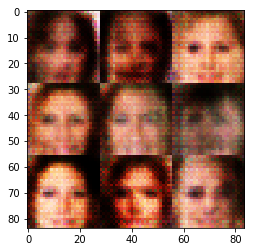

Epoch 1/1... Discriminator Loss: 0.6116... Generator Loss: 5.5313
Epoch 1/1... Discriminator Loss: 1.0311... Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 2.7052... Generator Loss: 0.1166
Epoch 1/1... Discriminator Loss: 0.3621... Generator Loss: 1.6247
Epoch 1/1... Discriminator Loss: 0.2038... Generator Loss: 3.4647
Epoch 1/1... Discriminator Loss: 0.1660... Generator Loss: 4.1944
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 0.4508... Generator Loss: 1.2965
Epoch 1/1... Discriminator Loss: 0.4667... Generator Loss: 3.2981
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.3616


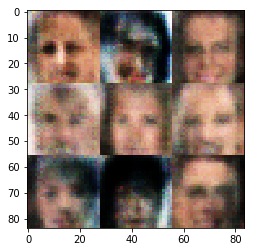

Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.0449
Epoch 1/1... Discriminator Loss: 0.3466... Generator Loss: 3.0962
Epoch 1/1... Discriminator Loss: 0.5366... Generator Loss: 1.3881
Epoch 1/1... Discriminator Loss: 0.8536... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 0.4159... Generator Loss: 1.5303
Epoch 1/1... Discriminator Loss: 2.1992... Generator Loss: 0.1528
Epoch 1/1... Discriminator Loss: 0.4419... Generator Loss: 4.5079
Epoch 1/1... Discriminator Loss: 0.6699... Generator Loss: 1.0401
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.4362


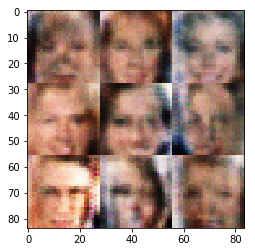

Epoch 1/1... Discriminator Loss: 1.7166... Generator Loss: 0.3101
Epoch 1/1... Discriminator Loss: 0.5837... Generator Loss: 1.0724
Epoch 1/1... Discriminator Loss: 0.5034... Generator Loss: 1.4596
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 0.9715
Epoch 1/1... Discriminator Loss: 0.3905... Generator Loss: 1.5593
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 4.2064
Epoch 1/1... Discriminator Loss: 0.8504... Generator Loss: 3.3869
Epoch 1/1... Discriminator Loss: 1.2033... Generator Loss: 0.4885
Epoch 1/1... Discriminator Loss: 2.7591... Generator Loss: 0.0849
Epoch 1/1... Discriminator Loss: 0.7575... Generator Loss: 1.4719


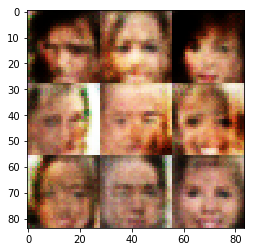

Epoch 1/1... Discriminator Loss: 0.5835... Generator Loss: 1.2825
Epoch 1/1... Discriminator Loss: 0.4485... Generator Loss: 2.4800
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 2.2160
Epoch 1/1... Discriminator Loss: 0.4438... Generator Loss: 1.3968
Epoch 1/1... Discriminator Loss: 0.8317... Generator Loss: 1.0267
Epoch 1/1... Discriminator Loss: 0.6302... Generator Loss: 1.9727
Epoch 1/1... Discriminator Loss: 0.3636... Generator Loss: 3.4005
Epoch 1/1... Discriminator Loss: 0.4117... Generator Loss: 2.8463
Epoch 1/1... Discriminator Loss: 0.5725... Generator Loss: 1.3560
Epoch 1/1... Discriminator Loss: 2.0634... Generator Loss: 1.2112


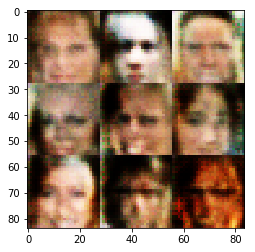

Epoch 1/1... Discriminator Loss: 0.2551... Generator Loss: 2.2571
Epoch 1/1... Discriminator Loss: 1.6198... Generator Loss: 0.3189
Epoch 1/1... Discriminator Loss: 0.4040... Generator Loss: 2.0622
Epoch 1/1... Discriminator Loss: 0.0627... Generator Loss: 6.6027
Epoch 1/1... Discriminator Loss: 0.8567... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 0.1555... Generator Loss: 5.4855
Epoch 1/1... Discriminator Loss: 0.3197... Generator Loss: 1.8496
Epoch 1/1... Discriminator Loss: 0.1560... Generator Loss: 2.9001
Epoch 1/1... Discriminator Loss: 0.1881... Generator Loss: 2.7013
Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 1.5056


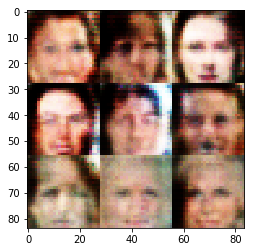

Epoch 1/1... Discriminator Loss: 0.4187... Generator Loss: 2.1642
Epoch 1/1... Discriminator Loss: 0.7908... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.5795... Generator Loss: 0.2733
Epoch 1/1... Discriminator Loss: 0.3848... Generator Loss: 1.6195
Epoch 1/1... Discriminator Loss: 0.1107... Generator Loss: 5.3799
Epoch 1/1... Discriminator Loss: 0.5932... Generator Loss: 1.1445
Epoch 1/1... Discriminator Loss: 0.1039... Generator Loss: 5.8992
Epoch 1/1... Discriminator Loss: 2.5320... Generator Loss: 0.1183
Epoch 1/1... Discriminator Loss: 0.1001... Generator Loss: 3.8228
Epoch 1/1... Discriminator Loss: 0.0666... Generator Loss: 5.4801


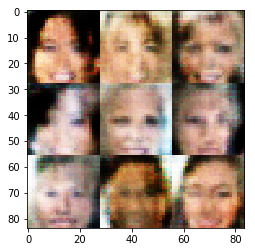

Epoch 1/1... Discriminator Loss: 0.1467... Generator Loss: 3.9904
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 1.1409
Epoch 1/1... Discriminator Loss: 0.5198... Generator Loss: 1.6518
Epoch 1/1... Discriminator Loss: 0.1661... Generator Loss: 6.0749
Epoch 1/1... Discriminator Loss: 0.1766... Generator Loss: 2.7291
Epoch 1/1... Discriminator Loss: 0.1744... Generator Loss: 2.2643
Epoch 1/1... Discriminator Loss: 0.3449... Generator Loss: 1.7328
Epoch 1/1... Discriminator Loss: 0.5404... Generator Loss: 5.7740
Epoch 1/1... Discriminator Loss: 0.0831... Generator Loss: 5.0094
Epoch 1/1... Discriminator Loss: 0.8837... Generator Loss: 0.6618


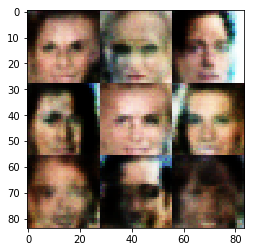

Epoch 1/1... Discriminator Loss: 0.5063... Generator Loss: 1.6253
Epoch 1/1... Discriminator Loss: 0.6081... Generator Loss: 0.9721
Epoch 1/1... Discriminator Loss: 1.7182... Generator Loss: 0.2538
Epoch 1/1... Discriminator Loss: 0.6791... Generator Loss: 6.6745
Epoch 1/1... Discriminator Loss: 0.1430... Generator Loss: 3.7488
Epoch 1/1... Discriminator Loss: 0.2292... Generator Loss: 2.1497
Epoch 1/1... Discriminator Loss: 0.1946... Generator Loss: 2.8981
Epoch 1/1... Discriminator Loss: 1.1526... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 0.1644... Generator Loss: 2.6246
Epoch 1/1... Discriminator Loss: 0.3110... Generator Loss: 6.3011


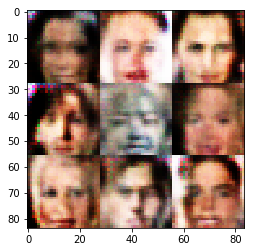

Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 1.7353
Epoch 1/1... Discriminator Loss: 0.1482... Generator Loss: 5.2803
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 1.9199
Epoch 1/1... Discriminator Loss: 0.3296... Generator Loss: 2.5345
Epoch 1/1... Discriminator Loss: 0.2529... Generator Loss: 6.1782
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 0.5466... Generator Loss: 1.6615
Epoch 1/1... Discriminator Loss: 3.3225... Generator Loss: 0.0549
Epoch 1/1... Discriminator Loss: 0.3168... Generator Loss: 5.1978
Epoch 1/1... Discriminator Loss: 0.3353... Generator Loss: 1.8699


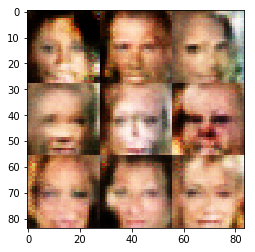

Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.7029... Generator Loss: 0.2467
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 0.1500... Generator Loss: 2.9244
Epoch 1/1... Discriminator Loss: 0.6417... Generator Loss: 0.9233
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.3391
Epoch 1/1... Discriminator Loss: 2.7926... Generator Loss: 1.6869
Epoch 1/1... Discriminator Loss: 0.3473... Generator Loss: 1.5747
Epoch 1/1... Discriminator Loss: 0.2957... Generator Loss: 2.0648
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 1.1167


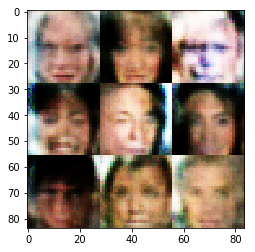

Epoch 1/1... Discriminator Loss: 0.5421... Generator Loss: 1.8452
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 0.5115... Generator Loss: 5.2722
Epoch 1/1... Discriminator Loss: 0.0919... Generator Loss: 3.9022
Epoch 1/1... Discriminator Loss: 0.3463... Generator Loss: 1.5487
Epoch 1/1... Discriminator Loss: 0.0994... Generator Loss: 3.4808
Epoch 1/1... Discriminator Loss: 0.2009... Generator Loss: 5.2015
Epoch 1/1... Discriminator Loss: 0.4401... Generator Loss: 1.4097
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.5314
Epoch 1/1... Discriminator Loss: 2.0355... Generator Loss: 0.1921


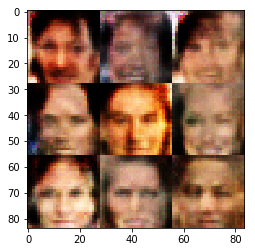

Epoch 1/1... Discriminator Loss: 0.1526... Generator Loss: 3.3714
Epoch 1/1... Discriminator Loss: 0.3708... Generator Loss: 1.6029
Epoch 1/1... Discriminator Loss: 0.5968... Generator Loss: 1.1342
Epoch 1/1... Discriminator Loss: 0.4287... Generator Loss: 1.3334
Epoch 1/1... Discriminator Loss: 0.0931... Generator Loss: 5.2526
Epoch 1/1... Discriminator Loss: 0.2704... Generator Loss: 2.3646
Epoch 1/1... Discriminator Loss: 0.2497... Generator Loss: 2.3800
Epoch 1/1... Discriminator Loss: 0.0800... Generator Loss: 3.0036
Epoch 1/1... Discriminator Loss: 0.0743... Generator Loss: 5.3723
Epoch 1/1... Discriminator Loss: 0.3541... Generator Loss: 1.5181


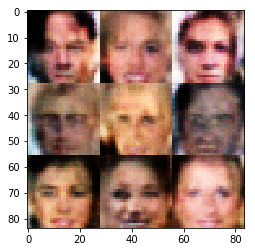

Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.8558... Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.5312... Generator Loss: 0.2926
Epoch 1/1... Discriminator Loss: 0.3435... Generator Loss: 6.5566
Epoch 1/1... Discriminator Loss: 0.1906... Generator Loss: 4.1662
Epoch 1/1... Discriminator Loss: 0.5169... Generator Loss: 2.5896
Epoch 1/1... Discriminator Loss: 0.1236... Generator Loss: 4.0564
Epoch 1/1... Discriminator Loss: 0.2359... Generator Loss: 3.8802
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 3.3658
Epoch 1/1... Discriminator Loss: 0.6032... Generator Loss: 1.6697


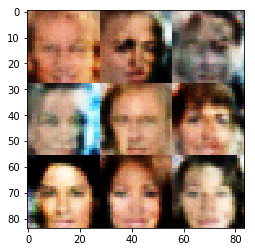

Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 1.5402
Epoch 1/1... Discriminator Loss: 0.1322... Generator Loss: 5.2080
Epoch 1/1... Discriminator Loss: 0.2850... Generator Loss: 1.6592
Epoch 1/1... Discriminator Loss: 0.6134... Generator Loss: 1.3506
Epoch 1/1... Discriminator Loss: 0.2453... Generator Loss: 2.4010
Epoch 1/1... Discriminator Loss: 0.1291... Generator Loss: 4.8571
Epoch 1/1... Discriminator Loss: 0.2375... Generator Loss: 1.8999
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 3.0389
Epoch 1/1... Discriminator Loss: 0.2046... Generator Loss: 2.1785
Epoch 1/1... Discriminator Loss: 0.0944... Generator Loss: 5.8927


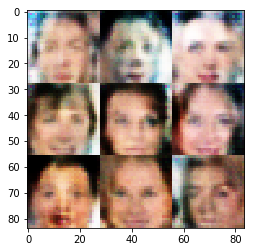

Epoch 1/1... Discriminator Loss: 0.2357... Generator Loss: 1.9711
Epoch 1/1... Discriminator Loss: 0.1791... Generator Loss: 2.4522
Epoch 1/1... Discriminator Loss: 0.4081... Generator Loss: 3.3176
Epoch 1/1... Discriminator Loss: 0.1579... Generator Loss: 3.6920
Epoch 1/1... Discriminator Loss: 0.1424... Generator Loss: 3.6175
Epoch 1/1... Discriminator Loss: 0.1635... Generator Loss: 3.0828
Epoch 1/1... Discriminator Loss: 0.2008... Generator Loss: 4.2129
Epoch 1/1... Discriminator Loss: 1.9025... Generator Loss: 0.2026
Epoch 1/1... Discriminator Loss: 0.0751... Generator Loss: 4.7446
Epoch 1/1... Discriminator Loss: 0.1177... Generator Loss: 6.0266


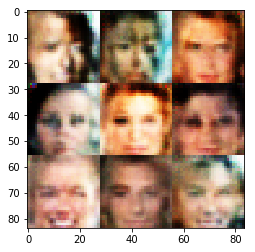

Epoch 1/1... Discriminator Loss: 0.4994... Generator Loss: 1.1380
Epoch 1/1... Discriminator Loss: 0.2088... Generator Loss: 2.2152
Epoch 1/1... Discriminator Loss: 0.1059... Generator Loss: 4.9772
Epoch 1/1... Discriminator Loss: 0.2978... Generator Loss: 1.6208
Epoch 1/1... Discriminator Loss: 0.3956... Generator Loss: 1.5840
Epoch 1/1... Discriminator Loss: 0.3956... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 0.2154... Generator Loss: 2.4813
Epoch 1/1... Discriminator Loss: 0.0777... Generator Loss: 3.8311
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 3.5833
Epoch 1/1... Discriminator Loss: 0.1642... Generator Loss: 5.8323


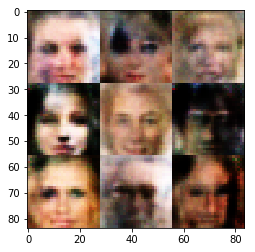

Epoch 1/1... Discriminator Loss: 0.2723... Generator Loss: 2.1652
Epoch 1/1... Discriminator Loss: 0.2871... Generator Loss: 2.3240
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 1.7850
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.9505
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 0.1291... Generator Loss: 4.5793
Epoch 1/1... Discriminator Loss: 0.0844... Generator Loss: 3.8094
Epoch 1/1... Discriminator Loss: 0.2155... Generator Loss: 2.2590
Epoch 1/1... Discriminator Loss: 0.3048... Generator Loss: 1.7332
Epoch 1/1... Discriminator Loss: 0.0594... Generator Loss: 4.1057


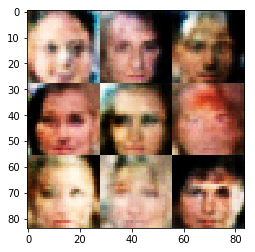

Epoch 1/1... Discriminator Loss: 0.1538... Generator Loss: 2.4024
Epoch 1/1... Discriminator Loss: 0.0582... Generator Loss: 3.8389
Epoch 1/1... Discriminator Loss: 0.0862... Generator Loss: 6.2230
Epoch 1/1... Discriminator Loss: 0.0593... Generator Loss: 5.6043
Epoch 1/1... Discriminator Loss: 0.3987... Generator Loss: 1.4243
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 1.0238
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.8732
Epoch 1/1... Discriminator Loss: 1.5932... Generator Loss: 0.4976


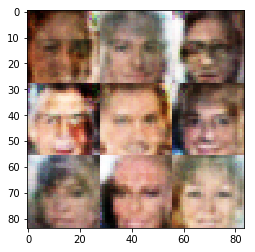

Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 1.3039
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.4815
Epoch 1/1... Discriminator Loss: 0.2615... Generator Loss: 1.8990
Epoch 1/1... Discriminator Loss: 0.3818... Generator Loss: 2.8131


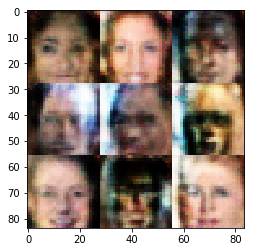

Epoch 1/1... Discriminator Loss: 1.8081... Generator Loss: 0.3214
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.4209
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 0.2165... Generator Loss: 2.2613
Epoch 1/1... Discriminator Loss: 0.1026... Generator Loss: 4.4137
Epoch 1/1... Discriminator Loss: 0.3890... Generator Loss: 1.4118
Epoch 1/1... Discriminator Loss: 0.1178... Generator Loss: 3.4643
Epoch 1/1... Discriminator Loss: 0.2306... Generator Loss: 2.6854
Epoch 1/1... Discriminator Loss: 0.2464... Generator Loss: 1.9867
Epoch 1/1... Discriminator Loss: 0.3009... Generator Loss: 4.5021


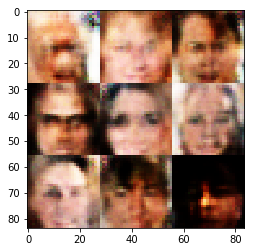

Epoch 1/1... Discriminator Loss: 0.8619... Generator Loss: 1.0841
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 1.1923
Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 0.1224... Generator Loss: 3.2089
Epoch 1/1... Discriminator Loss: 0.1392... Generator Loss: 3.2589
Epoch 1/1... Discriminator Loss: 0.4723... Generator Loss: 1.2410
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 0.9989
Epoch 1/1... Discriminator Loss: 1.5049... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 1.0345


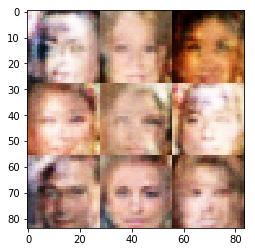

Epoch 1/1... Discriminator Loss: 0.7470... Generator Loss: 1.7884
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 0.8043... Generator Loss: 1.1184
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 1.3985
Epoch 1/1... Discriminator Loss: 0.4793... Generator Loss: 1.2558
Epoch 1/1... Discriminator Loss: 0.1824... Generator Loss: 3.5108
Epoch 1/1... Discriminator Loss: 0.2899... Generator Loss: 1.9034
Epoch 1/1... Discriminator Loss: 1.0893... Generator Loss: 0.7298
Epoch 1/1... Discriminator Loss: 0.6585... Generator Loss: 1.2610
Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 0.7791


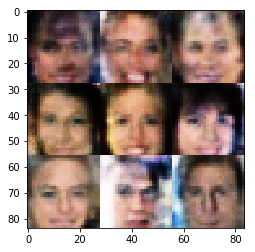

Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 0.3058... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 0.3694... Generator Loss: 1.5181
Epoch 1/1... Discriminator Loss: 0.2214... Generator Loss: 2.5222
Epoch 1/1... Discriminator Loss: 0.2998... Generator Loss: 1.6478
Epoch 1/1... Discriminator Loss: 0.6722... Generator Loss: 1.1391
Epoch 1/1... Discriminator Loss: 0.6903... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 0.5496... Generator Loss: 2.4247
Epoch 1/1... Discriminator Loss: 0.0863... Generator Loss: 5.3057


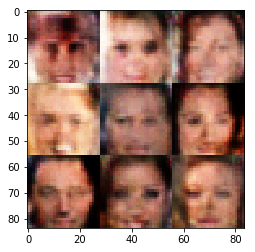

Epoch 1/1... Discriminator Loss: 0.1660... Generator Loss: 2.8466
Epoch 1/1... Discriminator Loss: 1.1418... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.0702... Generator Loss: 0.5458
Epoch 1/1... Discriminator Loss: 0.0857... Generator Loss: 7.0336
Epoch 1/1... Discriminator Loss: 0.2202... Generator Loss: 2.0672
Epoch 1/1... Discriminator Loss: 0.1731... Generator Loss: 2.9787
Epoch 1/1... Discriminator Loss: 2.8140... Generator Loss: 0.0949
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.3359
Epoch 1/1... Discriminator Loss: 0.1968... Generator Loss: 4.8394
Epoch 1/1... Discriminator Loss: 0.1402... Generator Loss: 3.9810


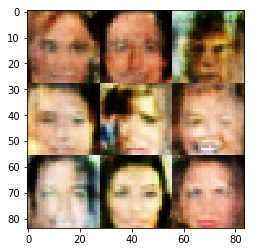

Epoch 1/1... Discriminator Loss: 0.1025... Generator Loss: 5.0819
Epoch 1/1... Discriminator Loss: 0.1419... Generator Loss: 4.6170
Epoch 1/1... Discriminator Loss: 0.0944... Generator Loss: 5.6080
Epoch 1/1... Discriminator Loss: 0.7292... Generator Loss: 2.5108
Epoch 1/1... Discriminator Loss: 0.2852... Generator Loss: 1.8484
Epoch 1/1... Discriminator Loss: 0.1841... Generator Loss: 2.8329
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.2797
Epoch 1/1... Discriminator Loss: 0.6038... Generator Loss: 1.1221
Epoch 1/1... Discriminator Loss: 0.6793... Generator Loss: 1.1650
Epoch 1/1... Discriminator Loss: 0.8434... Generator Loss: 1.1589


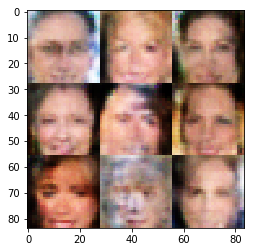

Epoch 1/1... Discriminator Loss: 0.0929... Generator Loss: 6.1177
Epoch 1/1... Discriminator Loss: 0.0906... Generator Loss: 3.9611
Epoch 1/1... Discriminator Loss: 0.0475... Generator Loss: 5.5668
Epoch 1/1... Discriminator Loss: 1.9086... Generator Loss: 1.5543
Epoch 1/1... Discriminator Loss: 0.0743... Generator Loss: 3.1543
Epoch 1/1... Discriminator Loss: 0.1750... Generator Loss: 2.7929
Epoch 1/1... Discriminator Loss: 0.0782... Generator Loss: 3.6966
Epoch 1/1... Discriminator Loss: 0.1027... Generator Loss: 7.0472
Epoch 1/1... Discriminator Loss: 0.2126... Generator Loss: 2.1716
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 0.7223


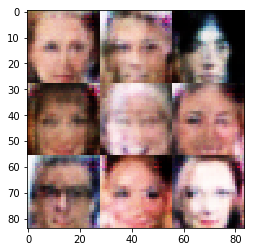

Epoch 1/1... Discriminator Loss: 0.7510... Generator Loss: 0.9754
Epoch 1/1... Discriminator Loss: 0.6969... Generator Loss: 1.3140
Epoch 1/1... Discriminator Loss: 0.9405... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 0.7880... Generator Loss: 1.1611
Epoch 1/1... Discriminator Loss: 0.1745... Generator Loss: 4.8180
Epoch 1/1... Discriminator Loss: 1.1270... Generator Loss: 0.6044
Epoch 1/1... Discriminator Loss: 0.4950... Generator Loss: 2.2971
Epoch 1/1... Discriminator Loss: 0.8808... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 1.7858
Epoch 1/1... Discriminator Loss: 0.7356... Generator Loss: 4.7708


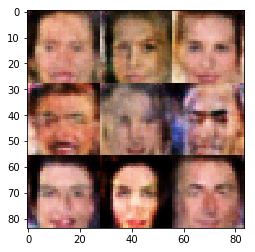

Epoch 1/1... Discriminator Loss: 0.2202... Generator Loss: 4.8888
Epoch 1/1... Discriminator Loss: 0.7119... Generator Loss: 1.2449
Epoch 1/1... Discriminator Loss: 0.4301... Generator Loss: 1.5205
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 0.2308... Generator Loss: 2.5147
Epoch 1/1... Discriminator Loss: 0.1108... Generator Loss: 4.5011
Epoch 1/1... Discriminator Loss: 0.0470... Generator Loss: 4.8955
Epoch 1/1... Discriminator Loss: 0.0369... Generator Loss: 4.2560
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.3029
Epoch 1/1... Discriminator Loss: 0.9537... Generator Loss: 0.8120


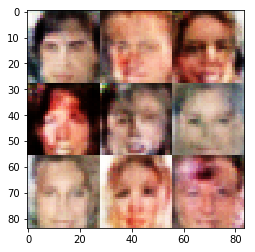

Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 0.6549... Generator Loss: 1.3283
Epoch 1/1... Discriminator Loss: 0.3352... Generator Loss: 2.0797
Epoch 1/1... Discriminator Loss: 0.1209... Generator Loss: 2.7603
Epoch 1/1... Discriminator Loss: 0.2155... Generator Loss: 2.1721
Epoch 1/1... Discriminator Loss: 0.0891... Generator Loss: 4.2155
Epoch 1/1... Discriminator Loss: 0.2838... Generator Loss: 1.7420
Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 0.9771
Epoch 1/1... Discriminator Loss: 0.1621... Generator Loss: 2.4665
Epoch 1/1... Discriminator Loss: 0.0847... Generator Loss: 4.3679


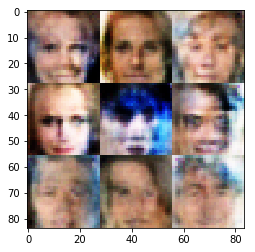

Epoch 1/1... Discriminator Loss: 0.0959... Generator Loss: 3.3058
Epoch 1/1... Discriminator Loss: 1.8069... Generator Loss: 0.2060
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 2.2943
Epoch 1/1... Discriminator Loss: 0.7598... Generator Loss: 1.1741
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 2.2262
Epoch 1/1... Discriminator Loss: 0.9139... Generator Loss: 1.0468
Epoch 1/1... Discriminator Loss: 0.1168... Generator Loss: 4.9899
Epoch 1/1... Discriminator Loss: 0.1482... Generator Loss: 6.7391
Epoch 1/1... Discriminator Loss: 0.2105... Generator Loss: 2.4698
Epoch 1/1... Discriminator Loss: 0.1128... Generator Loss: 3.0799


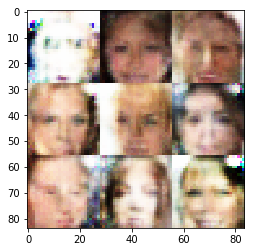

Epoch 1/1... Discriminator Loss: 0.1225... Generator Loss: 3.9081
Epoch 1/1... Discriminator Loss: 0.1139... Generator Loss: 3.0224
Epoch 1/1... Discriminator Loss: 0.1105... Generator Loss: 3.5729
Epoch 1/1... Discriminator Loss: 0.1748... Generator Loss: 2.4595
Epoch 1/1... Discriminator Loss: 0.0961... Generator Loss: 6.2920
Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 6.9578
Epoch 1/1... Discriminator Loss: 0.1190... Generator Loss: 3.3809
Epoch 1/1... Discriminator Loss: 0.1797... Generator Loss: 2.2619
Epoch 1/1... Discriminator Loss: 0.1334... Generator Loss: 2.6928
Epoch 1/1... Discriminator Loss: 1.2605... Generator Loss: 0.4697


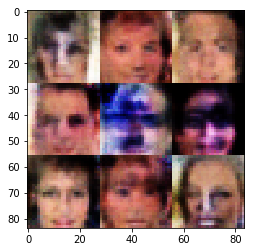

Epoch 1/1... Discriminator Loss: 0.7913... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 0.3176... Generator Loss: 2.7154
Epoch 1/1... Discriminator Loss: 0.4020... Generator Loss: 1.6362
Epoch 1/1... Discriminator Loss: 0.2219... Generator Loss: 2.1025
Epoch 1/1... Discriminator Loss: 0.8629... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 0.0431... Generator Loss: 5.7338
Epoch 1/1... Discriminator Loss: 0.0879... Generator Loss: 3.8693
Epoch 1/1... Discriminator Loss: 0.1201... Generator Loss: 4.2521
Epoch 1/1... Discriminator Loss: 0.1279... Generator Loss: 6.7148
Epoch 1/1... Discriminator Loss: 0.8058... Generator Loss: 3.9272


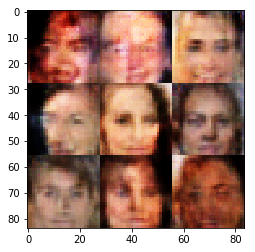

Epoch 1/1... Discriminator Loss: 0.2452... Generator Loss: 5.0441
Epoch 1/1... Discriminator Loss: 0.4479... Generator Loss: 1.4533
Epoch 1/1... Discriminator Loss: 0.5540... Generator Loss: 1.7199
Epoch 1/1... Discriminator Loss: 0.1364... Generator Loss: 2.4374
Epoch 1/1... Discriminator Loss: 0.5910... Generator Loss: 1.3886
Epoch 1/1... Discriminator Loss: 0.5787... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 0.4307... Generator Loss: 1.5039
Epoch 1/1... Discriminator Loss: 0.6863... Generator Loss: 0.8969
Epoch 1/1... Discriminator Loss: 0.6104... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 0.4612... Generator Loss: 1.3370


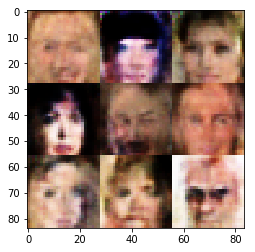

Epoch 1/1... Discriminator Loss: 0.0823... Generator Loss: 4.8380
Epoch 1/1... Discriminator Loss: 0.0679... Generator Loss: 5.5836
Epoch 1/1... Discriminator Loss: 0.1773... Generator Loss: 3.0454
Epoch 1/1... Discriminator Loss: 0.1280... Generator Loss: 5.5355
Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 6.0863
Epoch 1/1... Discriminator Loss: 0.0608... Generator Loss: 4.9765
Epoch 1/1... Discriminator Loss: 0.2012... Generator Loss: 2.2802
Epoch 1/1... Discriminator Loss: 0.2032... Generator Loss: 7.8985
Epoch 1/1... Discriminator Loss: 1.1914... Generator Loss: 1.6562
Epoch 1/1... Discriminator Loss: 0.5782... Generator Loss: 2.2139


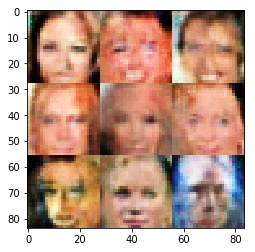

Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 1.2399
Epoch 1/1... Discriminator Loss: 0.0475... Generator Loss: 4.4132
Epoch 1/1... Discriminator Loss: 0.0865... Generator Loss: 4.7870
Epoch 1/1... Discriminator Loss: 0.1129... Generator Loss: 4.0879
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 0.8545... Generator Loss: 2.5275
Epoch 1/1... Discriminator Loss: 0.1186... Generator Loss: 3.8525
Epoch 1/1... Discriminator Loss: 0.0724... Generator Loss: 3.8087
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 4.4767
Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 1.1547


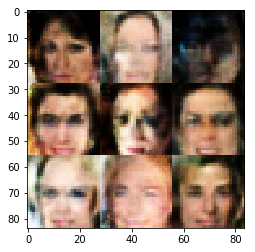

Epoch 1/1... Discriminator Loss: 0.0896... Generator Loss: 5.9508
Epoch 1/1... Discriminator Loss: 2.1857... Generator Loss: 0.1582
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.4571
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 1.9829
Epoch 1/1... Discriminator Loss: 0.2574... Generator Loss: 2.3669
Epoch 1/1... Discriminator Loss: 0.1499... Generator Loss: 3.4528
Epoch 1/1... Discriminator Loss: 0.1232... Generator Loss: 4.3055
Epoch 1/1... Discriminator Loss: 0.0534... Generator Loss: 6.4626
Epoch 1/1... Discriminator Loss: 0.1974... Generator Loss: 2.2690
Epoch 1/1... Discriminator Loss: 2.9447... Generator Loss: 0.1556


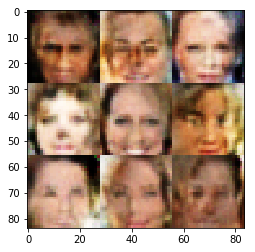

Epoch 1/1... Discriminator Loss: 0.0332... Generator Loss: 6.4951
Epoch 1/1... Discriminator Loss: 0.2998... Generator Loss: 1.8037
Epoch 1/1... Discriminator Loss: 0.2906... Generator Loss: 2.5842
Epoch 1/1... Discriminator Loss: 0.1372... Generator Loss: 4.9475
Epoch 1/1... Discriminator Loss: 0.0485... Generator Loss: 5.1130
Epoch 1/1... Discriminator Loss: 0.2294... Generator Loss: 2.7549
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 0.1537... Generator Loss: 2.4576
Epoch 1/1... Discriminator Loss: 0.7635... Generator Loss: 3.1705
Epoch 1/1... Discriminator Loss: 0.0730... Generator Loss: 4.9695


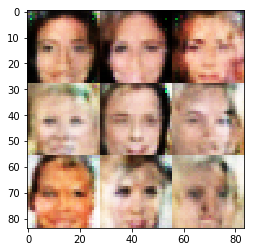

Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 0.6073
Epoch 1/1... Discriminator Loss: 0.9067... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 0.7272
Epoch 1/1... Discriminator Loss: 0.1727... Generator Loss: 2.5079
Epoch 1/1... Discriminator Loss: 0.2600... Generator Loss: 3.2089
Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 1.1485
Epoch 1/1... Discriminator Loss: 0.0708... Generator Loss: 4.8599
Epoch 1/1... Discriminator Loss: 0.0675... Generator Loss: 6.5313
Epoch 1/1... Discriminator Loss: 0.0356... Generator Loss: 7.7574
Epoch 1/1... Discriminator Loss: 0.1552... Generator Loss: 5.3172


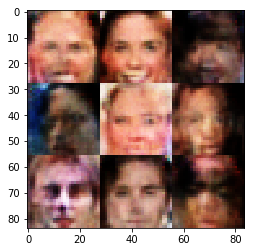

Epoch 1/1... Discriminator Loss: 0.2503... Generator Loss: 1.7937
Epoch 1/1... Discriminator Loss: 0.3048... Generator Loss: 3.6074
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 3.1259
Epoch 1/1... Discriminator Loss: 0.0677... Generator Loss: 5.8915
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.4040
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 2.7933
Epoch 1/1... Discriminator Loss: 0.1207... Generator Loss: 6.3448
Epoch 1/1... Discriminator Loss: 0.4994... Generator Loss: 1.2446
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 1.3831
Epoch 1/1... Discriminator Loss: 0.7135... Generator Loss: 0.9454


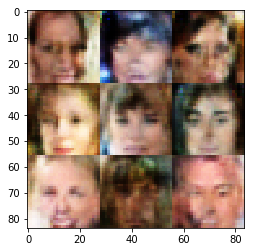

Epoch 1/1... Discriminator Loss: 0.2865... Generator Loss: 2.3271
Epoch 1/1... Discriminator Loss: 0.5950... Generator Loss: 1.1674
Epoch 1/1... Discriminator Loss: 0.5142... Generator Loss: 1.3647
Epoch 1/1... Discriminator Loss: 0.0980... Generator Loss: 4.3658
Epoch 1/1... Discriminator Loss: 0.0843... Generator Loss: 3.7741
Epoch 1/1... Discriminator Loss: 0.1197... Generator Loss: 5.8953
Epoch 1/1... Discriminator Loss: 1.1415... Generator Loss: 0.4776
Epoch 1/1... Discriminator Loss: 1.2034... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.6624... Generator Loss: 0.3254
Epoch 1/1... Discriminator Loss: 0.6323... Generator Loss: 1.0612


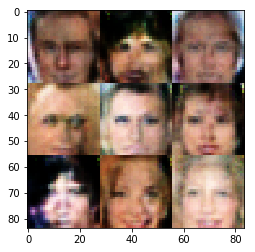

Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.3872
Epoch 1/1... Discriminator Loss: 0.5505... Generator Loss: 1.0767
Epoch 1/1... Discriminator Loss: 0.1274... Generator Loss: 2.6457
Epoch 1/1... Discriminator Loss: 0.1308... Generator Loss: 3.6865
Epoch 1/1... Discriminator Loss: 0.1111... Generator Loss: 3.3691
Epoch 1/1... Discriminator Loss: 0.0560... Generator Loss: 4.5147
Epoch 1/1... Discriminator Loss: 0.0635... Generator Loss: 4.9793
Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 0.2384... Generator Loss: 3.6239
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 0.8602


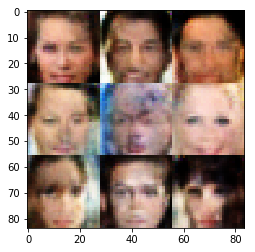

Epoch 1/1... Discriminator Loss: 0.7803... Generator Loss: 1.1242
Epoch 1/1... Discriminator Loss: 0.8749... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 0.8542... Generator Loss: 0.9038
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 2.1918
Epoch 1/1... Discriminator Loss: 0.6859... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 0.2550... Generator Loss: 5.6864
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 0.1513... Generator Loss: 2.6403
Epoch 1/1... Discriminator Loss: 0.1947... Generator Loss: 2.1545
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 2.7428


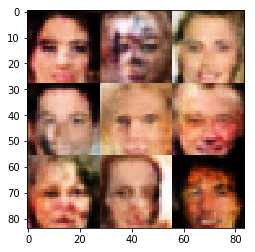

Epoch 1/1... Discriminator Loss: 0.0790... Generator Loss: 6.3512
Epoch 1/1... Discriminator Loss: 0.1307... Generator Loss: 4.9063
Epoch 1/1... Discriminator Loss: 0.0656... Generator Loss: 6.0726
Epoch 1/1... Discriminator Loss: 0.1675... Generator Loss: 2.3919
Epoch 1/1... Discriminator Loss: 0.1087... Generator Loss: 2.7178
Epoch 1/1... Discriminator Loss: 0.1740... Generator Loss: 5.2239
Epoch 1/1... Discriminator Loss: 0.9455... Generator Loss: 0.9788
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 0.5845
Epoch 1/1... Discriminator Loss: 0.8266... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 0.6973... Generator Loss: 1.0716


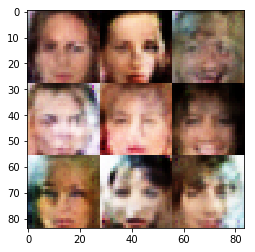

Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 1.5527
Epoch 1/1... Discriminator Loss: 0.4548... Generator Loss: 1.2915
Epoch 1/1... Discriminator Loss: 0.3642... Generator Loss: 4.7537
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.3033
Epoch 1/1... Discriminator Loss: 0.0721... Generator Loss: 4.0633
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 1.1915
Epoch 1/1... Discriminator Loss: 0.6613... Generator Loss: 1.2480
Epoch 1/1... Discriminator Loss: 1.5174... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 0.8929... Generator Loss: 0.7278
Epoch 1/1... Discriminator Loss: 0.8203... Generator Loss: 0.9568


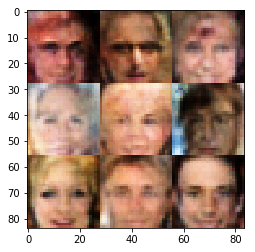

Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 3.7312
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.3941
Epoch 1/1... Discriminator Loss: 0.0690... Generator Loss: 7.4864
Epoch 1/1... Discriminator Loss: 0.0784... Generator Loss: 5.9754
Epoch 1/1... Discriminator Loss: 0.1880... Generator Loss: 3.3544
Epoch 1/1... Discriminator Loss: 0.0388... Generator Loss: 4.8771
Epoch 1/1... Discriminator Loss: 0.0658... Generator Loss: 4.0265
Epoch 1/1... Discriminator Loss: 0.0396... Generator Loss: 4.5697
Epoch 1/1... Discriminator Loss: 0.1422... Generator Loss: 3.4657
Epoch 1/1... Discriminator Loss: 0.5471... Generator Loss: 1.0787


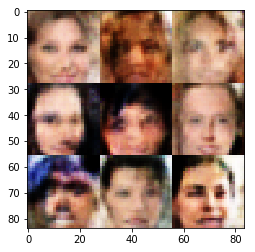

Epoch 1/1... Discriminator Loss: 0.1344... Generator Loss: 3.1493
Epoch 1/1... Discriminator Loss: 0.3431... Generator Loss: 1.5123
Epoch 1/1... Discriminator Loss: 2.4977... Generator Loss: 4.0655
Epoch 1/1... Discriminator Loss: 0.6636... Generator Loss: 1.5427
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.3747
Epoch 1/1... Discriminator Loss: 0.6494... Generator Loss: 1.2842
Epoch 1/1... Discriminator Loss: 0.6157... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 0.5075... Generator Loss: 1.5536
Epoch 1/1... Discriminator Loss: 0.7710... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 0.2916... Generator Loss: 2.0224


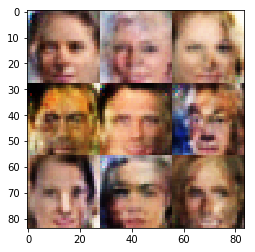

Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.3134
Epoch 1/1... Discriminator Loss: 0.2778... Generator Loss: 3.1579
Epoch 1/1... Discriminator Loss: 0.2232... Generator Loss: 2.1241
Epoch 1/1... Discriminator Loss: 0.2097... Generator Loss: 4.8500
Epoch 1/1... Discriminator Loss: 0.9859... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 0.7246... Generator Loss: 1.1281
Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 0.1594... Generator Loss: 6.3444
Epoch 1/1... Discriminator Loss: 0.1662... Generator Loss: 3.0264
Epoch 1/1... Discriminator Loss: 0.0431... Generator Loss: 4.5097


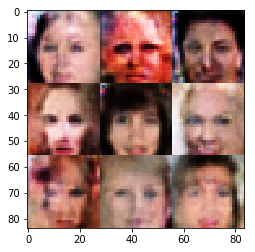

Epoch 1/1... Discriminator Loss: 0.6541... Generator Loss: 1.3038
Epoch 1/1... Discriminator Loss: 0.2506... Generator Loss: 4.8105
Epoch 1/1... Discriminator Loss: 0.3949... Generator Loss: 1.9036
Epoch 1/1... Discriminator Loss: 0.3344... Generator Loss: 1.9616
Epoch 1/1... Discriminator Loss: 0.4905... Generator Loss: 1.3223
Epoch 1/1... Discriminator Loss: 0.4725... Generator Loss: 4.4694
Epoch 1/1... Discriminator Loss: 0.1754... Generator Loss: 3.3872
Epoch 1/1... Discriminator Loss: 0.4809... Generator Loss: 1.5349
Epoch 1/1... Discriminator Loss: 0.0649... Generator Loss: 3.5390
Epoch 1/1... Discriminator Loss: 0.1896... Generator Loss: 2.7170


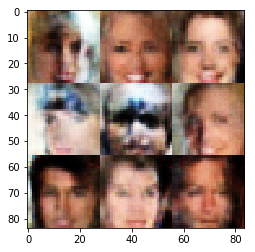

Epoch 1/1... Discriminator Loss: 0.2464... Generator Loss: 2.0426
Epoch 1/1... Discriminator Loss: 0.0418... Generator Loss: 4.0627
Epoch 1/1... Discriminator Loss: 0.1483... Generator Loss: 3.2761
Epoch 1/1... Discriminator Loss: 0.0872... Generator Loss: 3.3055
Epoch 1/1... Discriminator Loss: 0.3504... Generator Loss: 1.5672
Epoch 1/1... Discriminator Loss: 0.1760... Generator Loss: 4.3797
Epoch 1/1... Discriminator Loss: 0.0792... Generator Loss: 3.7690
Epoch 1/1... Discriminator Loss: 0.5252... Generator Loss: 1.4473
Epoch 1/1... Discriminator Loss: 0.4438... Generator Loss: 1.4808
Epoch 1/1... Discriminator Loss: 0.5824... Generator Loss: 1.2207


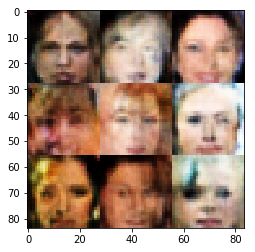

Epoch 1/1... Discriminator Loss: 0.8890... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 0.2576... Generator Loss: 2.0096
Epoch 1/1... Discriminator Loss: 0.3601... Generator Loss: 1.6610
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.4346
Epoch 1/1... Discriminator Loss: 0.0414... Generator Loss: 4.8496
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 7.1601
Epoch 1/1... Discriminator Loss: 0.0520... Generator Loss: 4.3122
Epoch 1/1... Discriminator Loss: 0.2968... Generator Loss: 1.8829
Epoch 1/1... Discriminator Loss: 0.1849... Generator Loss: 2.4434
Epoch 1/1... Discriminator Loss: 0.0840... Generator Loss: 2.8888


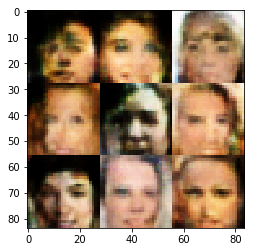

Epoch 1/1... Discriminator Loss: 0.0903... Generator Loss: 3.2541
Epoch 1/1... Discriminator Loss: 0.0562... Generator Loss: 4.8213
Epoch 1/1... Discriminator Loss: 0.0603... Generator Loss: 4.2310
Epoch 1/1... Discriminator Loss: 1.5223... Generator Loss: 0.3817
Epoch 1/1... Discriminator Loss: 0.1099... Generator Loss: 4.9438
Epoch 1/1... Discriminator Loss: 0.0729... Generator Loss: 5.5793
Epoch 1/1... Discriminator Loss: 0.2037... Generator Loss: 2.4343
Epoch 1/1... Discriminator Loss: 0.1511... Generator Loss: 2.5876
Epoch 1/1... Discriminator Loss: 0.8248... Generator Loss: 2.4221
Epoch 1/1... Discriminator Loss: 0.0537... Generator Loss: 8.9091


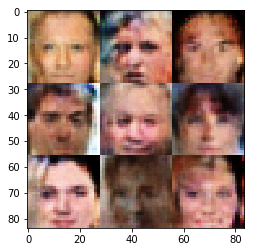

Epoch 1/1... Discriminator Loss: 0.0485... Generator Loss: 5.8828
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 3.2189... Generator Loss: 5.6191
Epoch 1/1... Discriminator Loss: 0.8299... Generator Loss: 0.9108
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 0.1399... Generator Loss: 3.1296
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.5030
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 0.3290... Generator Loss: 2.3841
Epoch 1/1... Discriminator Loss: 0.7035... Generator Loss: 1.2009


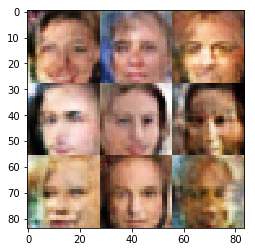

Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 1.7063
Epoch 1/1... Discriminator Loss: 0.5606... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 0.6229... Generator Loss: 1.3897
Epoch 1/1... Discriminator Loss: 0.0833... Generator Loss: 4.4065
Epoch 1/1... Discriminator Loss: 0.0466... Generator Loss: 7.2381
Epoch 1/1... Discriminator Loss: 0.2241... Generator Loss: 4.9109
Epoch 1/1... Discriminator Loss: 0.0667... Generator Loss: 5.0143
Epoch 1/1... Discriminator Loss: 0.1707... Generator Loss: 2.5003
Epoch 1/1... Discriminator Loss: 0.5370... Generator Loss: 1.1817
Epoch 1/1... Discriminator Loss: 0.7102... Generator Loss: 0.7863


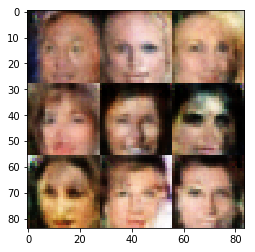

Epoch 1/1... Discriminator Loss: 0.5370... Generator Loss: 1.2575
Epoch 1/1... Discriminator Loss: 0.2088... Generator Loss: 2.1326
Epoch 1/1... Discriminator Loss: 0.4412... Generator Loss: 1.4976
Epoch 1/1... Discriminator Loss: 0.1012... Generator Loss: 3.7441
Epoch 1/1... Discriminator Loss: 0.9119... Generator Loss: 2.4911
Epoch 1/1... Discriminator Loss: 0.2242... Generator Loss: 2.3802
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 6.3819
Epoch 1/1... Discriminator Loss: 1.6366... Generator Loss: 3.3036
Epoch 1/1... Discriminator Loss: 0.8387... Generator Loss: 0.7682
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.4994


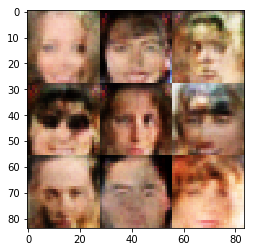

Epoch 1/1... Discriminator Loss: 0.7706... Generator Loss: 1.0623
Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 0.4225... Generator Loss: 2.0030
Epoch 1/1... Discriminator Loss: 0.0961... Generator Loss: 3.1724
Epoch 1/1... Discriminator Loss: 0.7783... Generator Loss: 1.0212
Epoch 1/1... Discriminator Loss: 0.0790... Generator Loss: 4.5113
Epoch 1/1... Discriminator Loss: 0.2771... Generator Loss: 2.1080
Epoch 1/1... Discriminator Loss: 0.5766... Generator Loss: 7.8788
Epoch 1/1... Discriminator Loss: 0.1453... Generator Loss: 2.7080
Epoch 1/1... Discriminator Loss: 0.3414... Generator Loss: 4.9463


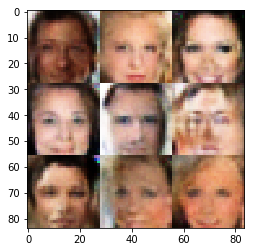

Epoch 1/1... Discriminator Loss: 0.1456... Generator Loss: 3.1935
Epoch 1/1... Discriminator Loss: 0.1894... Generator Loss: 2.7665
Epoch 1/1... Discriminator Loss: 0.0862... Generator Loss: 4.6420
Epoch 1/1... Discriminator Loss: 0.2173... Generator Loss: 2.3275
Epoch 1/1... Discriminator Loss: 0.1692... Generator Loss: 4.0558
Epoch 1/1... Discriminator Loss: 0.4799... Generator Loss: 1.3878
Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 1.6930
Epoch 1/1... Discriminator Loss: 0.0101... Generator Loss: 6.6252
Epoch 1/1... Discriminator Loss: 0.4713... Generator Loss: 1.3531
Epoch 1/1... Discriminator Loss: 0.1074... Generator Loss: 3.3446


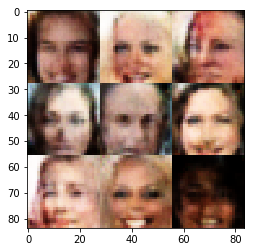

Epoch 1/1... Discriminator Loss: 0.2762... Generator Loss: 4.5722
Epoch 1/1... Discriminator Loss: 0.1651... Generator Loss: 3.3694
Epoch 1/1... Discriminator Loss: 0.5020... Generator Loss: 1.4364


In [13]:
batch_size = 32
z_dim = 200
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.